In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import random 

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

In [70]:
options = {'Real bad': 1, 'Normal': 2, 'All good': 3}

heart_rate = []
steps = []
sleep = []

for x in range(10000):
    heart_rate.append(random.choice(list(options.keys())))
    steps.append(random.randint(0, 1000))
    sleep.append(random.randint(5, 8))
    
def verdict(df):
    
    # mean and std
    steps_mean = df.Steps.mean()
    steps_std = df.Steps.std()
    
    sleep_mean = df.Sleep.mean()
    sleep_std = df.Sleep.std()
    
    verdict = []

    for index, row in df.iterrows():
        count = 0
        # heart rate
        count += options[row.HR]

        # steps
        if row.Steps < (steps_mean - 3*steps_std) or row.Steps > (steps_mean + 3*steps_std):
            count += 1
        elif row.Steps > (steps_mean - steps_std) or row.Steps < (steps_mean + steps_std):
            count += 3
        else:
            count += 2

        # sleep
        if row.Sleep < (sleep_mean - sleep_std):
            count += 1
        elif row.Sleep > (sleep_mean + sleep_std):
            count += 3
        else: 
            count += 2

        if count < 6:
            verdict.append(1)
        elif count > 8:
            verdict.append(3)
        else:
            verdict.append(2)

        # reset
        count = 0
        
    return verdict

In [71]:
df = pd.DataFrame(data = {'HR': heart_rate, 'Steps': steps, 'Sleep': sleep})

# 1 is real bad; 2 is normal; 3 is real good
df['Score'] = verdict(df)

# one hot encoding
dummy = pd.get_dummies(df['HR'], prefix = 'HR')
new_df = pd.merge(left = df, right = dummy, left_index = True, right_index = True)
new_df

,HR,Steps,Sleep,Score,HR_All good,HR_Normal,HR_Real bad
0,Real bad,592,5,1,0,0,1
1,Normal,421,8,2,0,1,0
2,All good,763,7,2,1,0,0
3,Normal,111,8,2,0,1,0
4,Normal,208,5,2,0,1,0
...,...,...,...,...,...,...,...
9995,Real bad,664,7,2,0,0,1
9996,All good,227,6,2,1,0,0
9997,Normal,255,7,2,0,1,0
9998,All good,805,6,2,1,0,0


In [72]:
X = new_df[['Steps', 'Sleep', 'HR_All good', 'HR_Normal', 'HR_Real bad']]
y = new_df.Score

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [81]:
model = DecisionTreeClassifier(max_depth = 3) # anders returned ie altijd 100% --> overfitting
model = model.fit(x_train, y_train)

pred = model.predict(x_test)

print("Accuracy: ", round(accuracy_score(y_test, pred) * 100, 1), '%')

Accuracy:  100.0 %


<AxesSubplot:ylabel='Score'>

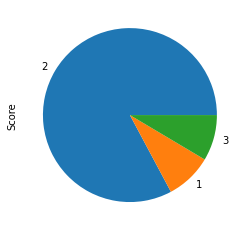

In [82]:
new_df.Score.value_counts().plot(kind = 'pie') # ff checken wat de verdeling is

In [83]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_1 <= 7.50
|   |--- feature_4 <= 0.50
|   |   |--- class: 2
|   |--- feature_4 >  0.50
|   |   |--- feature_1 <= 5.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  5.50
|   |   |   |--- class: 2
|--- feature_1 >  7.50
|   |--- feature_2 <= 0.50
|   |   |--- class: 2
|   |--- feature_2 >  0.50
|   |   |--- class: 3



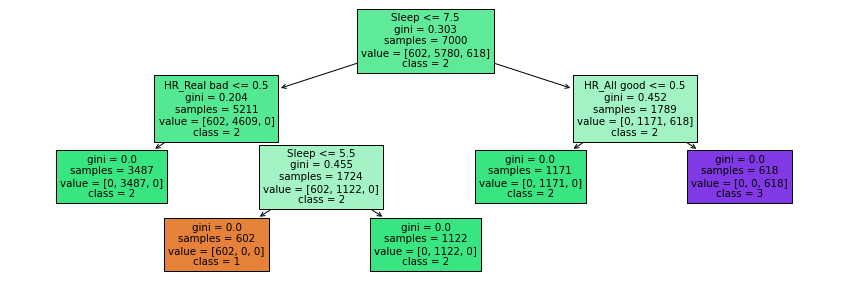

In [84]:
fig = plt.figure(figsize = (15, 5))

features = ['Steps', 'Sleep', 'HR_All good', 'HR_Normal', 'HR_Real bad']
target = y.unique().astype(str)

_ = tree.plot_tree(model, feature_names = features, class_names = target, filled = True)